# **Project 3**, APS1070 Fall 2020
#### **PCA [20 marks]**
**Deadline: Nov 8, 23:59**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Yonghao Li
*   **Student number**: 1004905668



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1-4**.
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day. We use this dataset in **Part 4**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 5**.

# Part 1: Getting started [3 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[1]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as you chose in `Step 1`. **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down? What do negative and positive values mean? **[1]**

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

cases_raw.head()

,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,30-Jan,31-Jan,01-Feb,02-Feb,03-Feb,04-Feb,05-Feb,06-Feb,07-Feb,08-Feb,09-Feb,10-Feb,11-Feb,12-Feb,13-Feb,14-Feb,15-Feb,16-Feb,17-Feb,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,26-Feb,27-Feb,28-Feb,29-Feb,01-Mar,...,03-Sep,04-Sep,05-Sep,06-Sep,07-Sep,08-Sep,09-Sep,10-Sep,11-Sep,12-Sep,13-Sep,14-Sep,15-Sep,16-Sep,17-Sep,18-Sep,19-Sep,20-Sep,21-Sep,22-Sep,23-Sep,24-Sep,25-Sep,26-Sep,27-Sep,28-Sep,29-Sep,30-Sep,01-Oct,02-Oct,03-Oct,04-Oct,05-Oct,06-Oct,07-Oct,08-Oct,09-Oct,10-Oct,11-Oct,12-Oct
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488


In [3]:
## Generate a list of 10 countries
country_list = ['US', 'China', 'Canada', 'India', 'Brazil', 'Russia', 'France',
                'Spain', 'Argentina', 'Colombia']

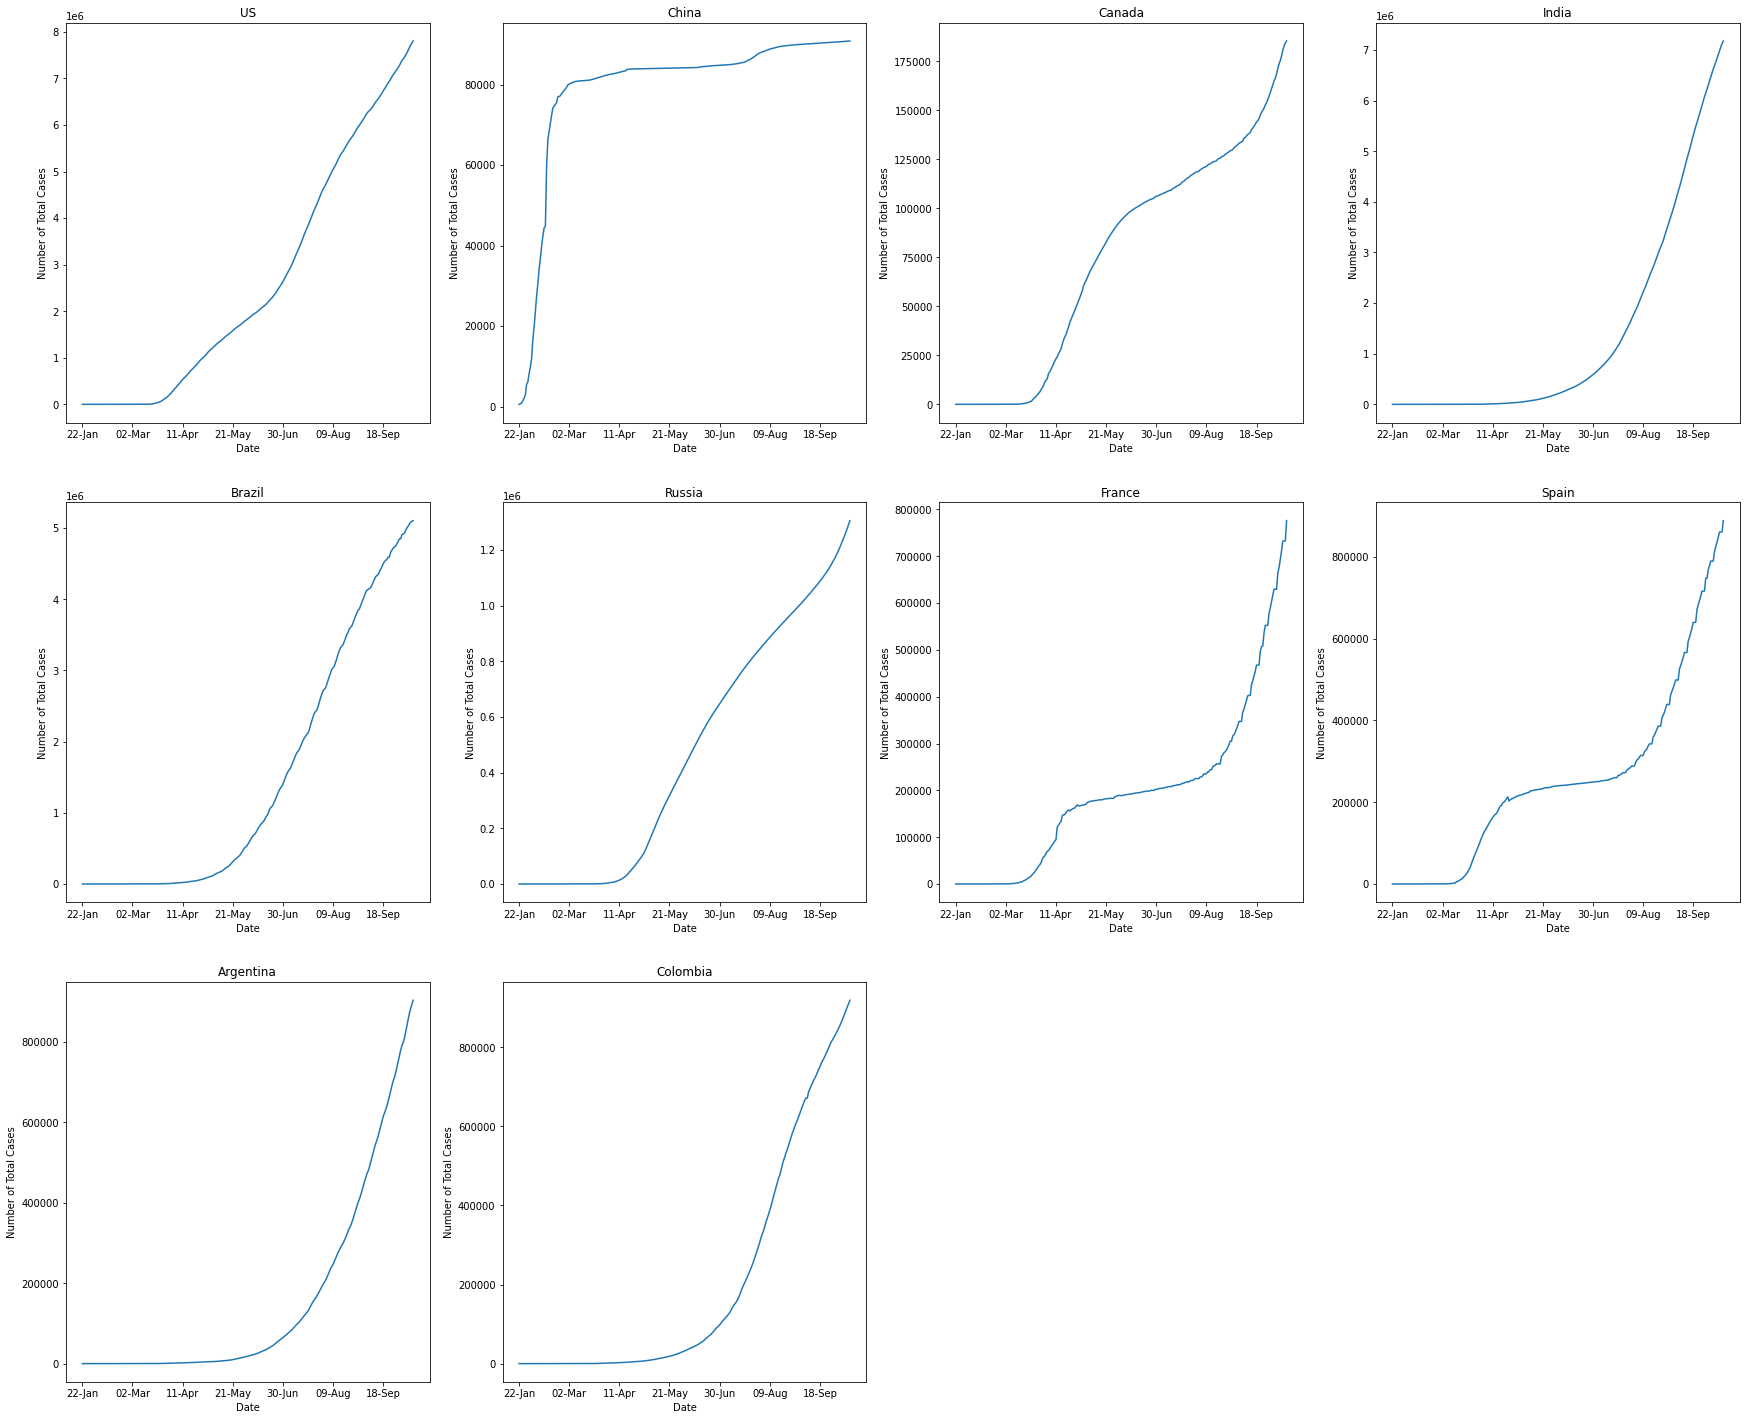

In [4]:
## Plot time-series of raw data
fig, axes = plt.subplots(3, 4, figsize=(30,25))

for i in range(len(country_list)):
  axes.flat[i].plot(cases_raw.loc[country_list[i]])
  axes.flat[i].xaxis.set_major_locator(plt.MaxNLocator(9))
  axes.flat[i].set(title=country_list[i], 
                   xlabel='Date',
                   ylabel='Number of Total Cases')

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

In [5]:
## Standardization of data
cases_std = StandardScaler().fit_transform(cases_raw)

In [6]:
## Check std mean and variance
cases_std[:, 0].mean(), cases_std[:, 0].var()

(4.69935671799008e-18, 1.0000000000000009)

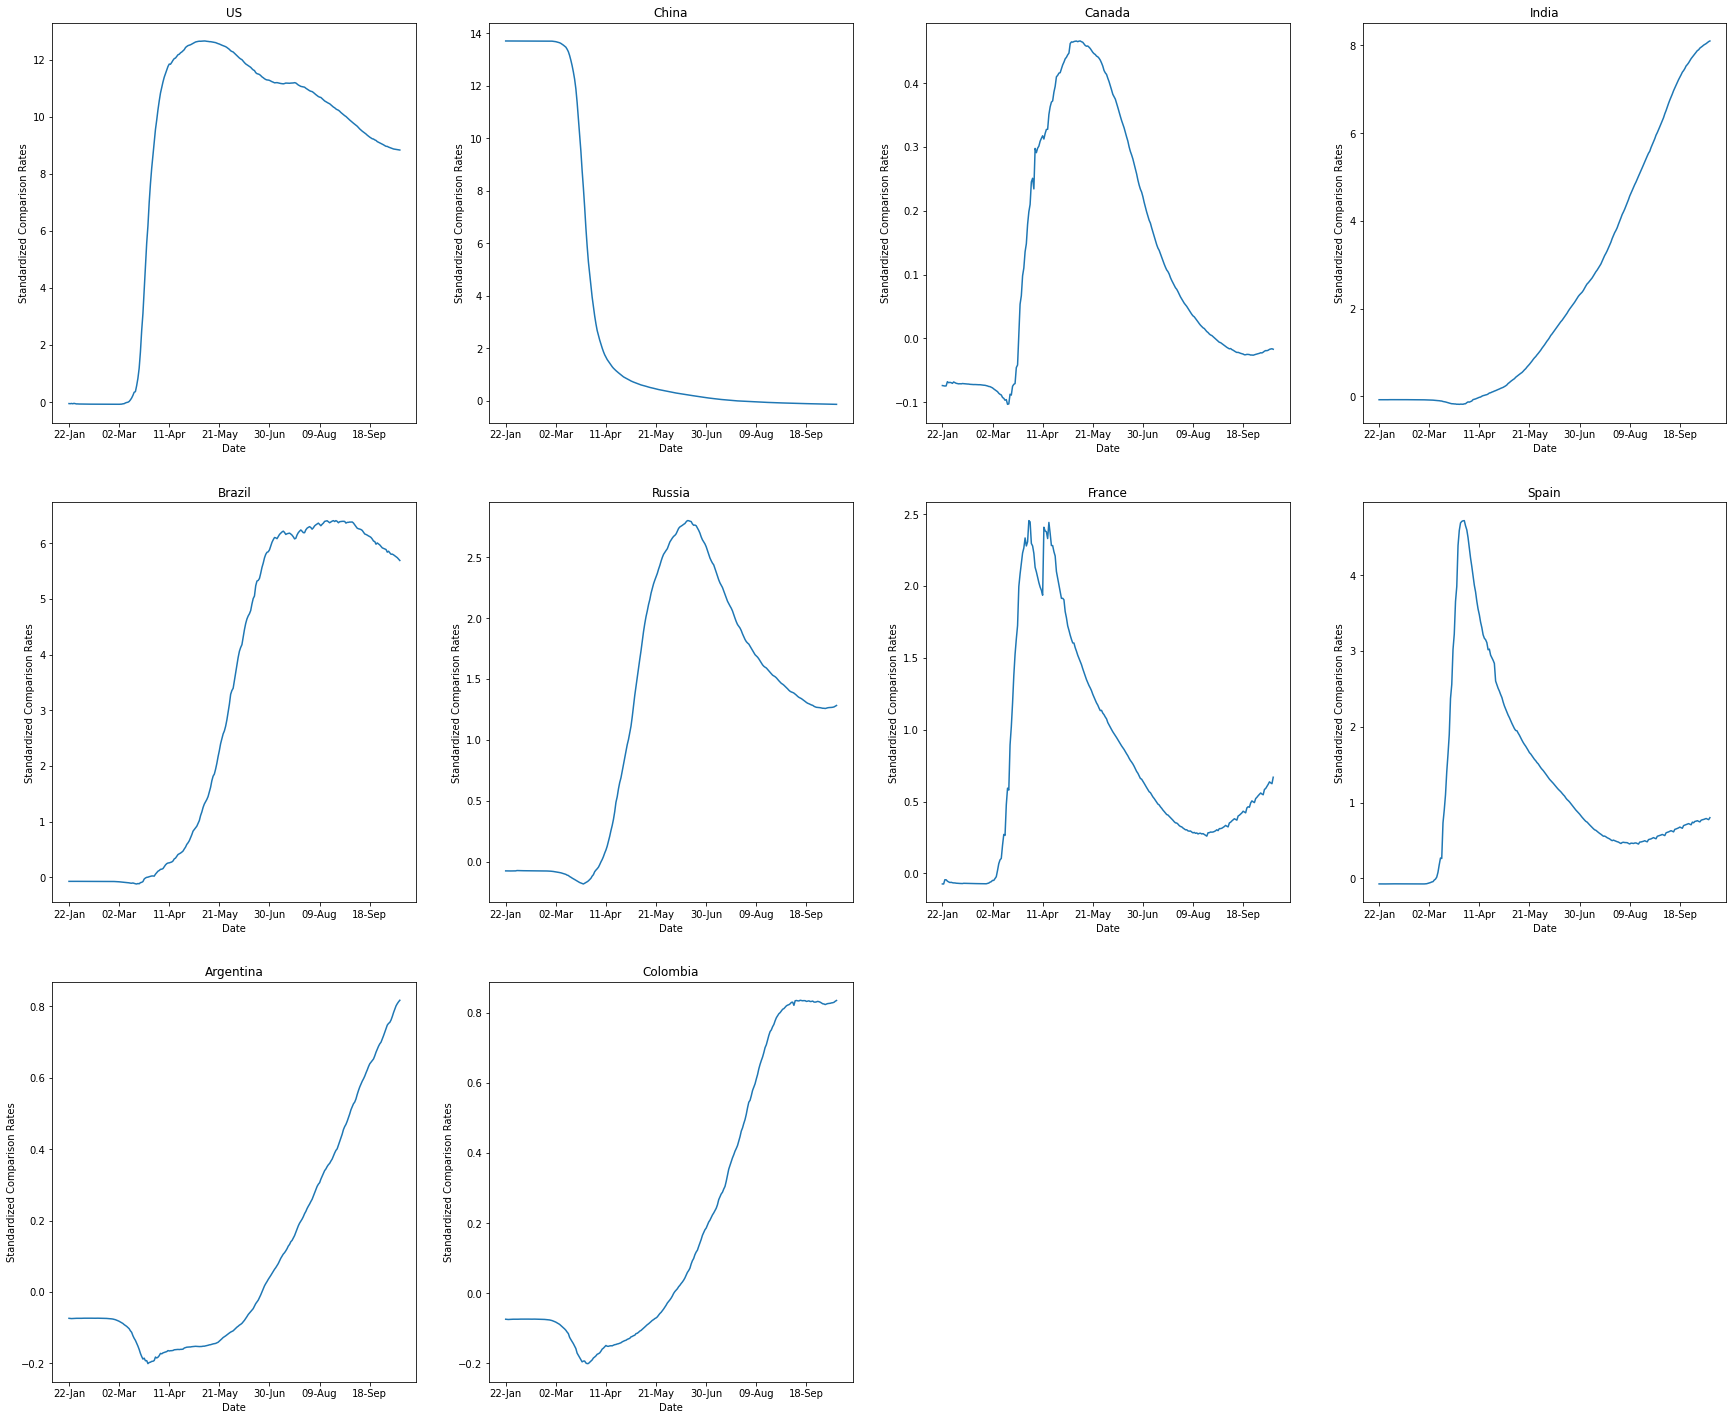

In [7]:
## Plot time-series of standardized data
cases_std_df = pd.DataFrame(cases_std, index=cases_raw.index, columns=cases_raw.columns)

fig, axes = plt.subplots(3, 4, figsize=(30,25))

for i in range(len(country_list)):
  axes.flat[i].plot(cases_std_df.loc[country_list[i]])
  axes.flat[i].xaxis.set_major_locator(plt.MaxNLocator(9))
  axes.flat[i].set(title=country_list[i], 
                   xlabel='Date',
                   ylabel='Standardized Comparison Rates')

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

For US, we can see that the curve shoots almost straight up starting mid-March, with countless people getting infected everyday. The curve reaches its peak around late April, and then the rate of infection seems to slow down compared to world average (less standard deviations away from the average) from May to September. However, even towards the end of September, US infection amount is still greater than 8 standard deviations above the world average everyday.

For Canada, we can see that the country's infection numbers are below world average (very few infections everyday) until mid to late March. Canada's Covid cases then rapidly increase starting from late March to mid May with less and less cases everyday after May. However, even during the peak period, Canada Covid cases are still only about 0.45 standard deviations above world average. This might be because of Canade's scarce population and better epidemic control procedures.

For China, the curve looks almost the exact opposite of the US curve. Around the start of 2020 (Jan to March), China's Covid cases are more than 13 standard deviations above the world average. At this time of the year most other countries has not yet have any reported cases yet, which explains the vast difference. Starting from early-March to mid-April, as the cases in China were more in control while the rest of the world started seeing more Covid cases, the curve rapidly decreases. The curve then keeps decreasing until it reaches 0 which is the world average around July to September.

If the curve goes up, it means that the country has an increasing rate of reported cases of population diagnosed with Covid-19, and the numbers correspond to how many standard deviations away from the world average on that particular day. If the curve goes down, it either means that the country has a decreasing rate of infection compared to the day before or the world's average confirmed cases surpass the average of the day before.

Positive values mean that the country has an infection population amount that is some standard deviations more than the world average on that day. Negative values mean the opposite such that the country has an infection population amount that is some standard deviations less then the world average on that day.

# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265).* **[0.5]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.5]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.5]**
5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [8]:
## Compute covariance matrix of standardize data
cases_cov = np.cov(cases_std.T)

## Check shape
cases_cov.shape

(265, 265)

In [9]:
## Compute eigenvalues and eigenvectors
eigenValues, eigenVectors = np.linalg.eigh(cases_cov)
eigenValues.shape, eigenVectors.shape

((265,), (265, 265))

In [10]:
## Sort based on decreasing order of eigenvalues
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [11]:
## Check culmulative explained variance with the eigenvalues
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 67.53148737,  90.84137079,  97.91963412,  99.31855519,
        99.83136531,  99.92576373,  99.97196972,  99.98584888,
        99.99262542,  99.99484289,  99.99667229,  99.99776301,
        99.99834872,  99.99874382,  99.99899204,  99.9991838 ,
        99.99936716,  99.99950393,  99.99962245,  99.99969551,
        99.99973992,  99.99977877,  99.99980935,  99.99983477,
        99.99985682,  99.99987546,  99.99989227,  99.99990627,
        99.99991835,  99.9999286 ,  99.99993737,  99.99994463,
        99.99995091,  99.99995626,  99.99996132,  99.99996568,
        99.99996934,  99.99997265,  99.99997566,  99.99997817,
        99.99998057,  99.99998285,  99.99998441,  99.99998582,
        99.9999871 ,  99.99998819,  99.99998926,  99.99999019,
        99.99999105,  99.99999185,  99.99999255,  99.99999321,
        99.9999938 ,  99.99999429,  99.99999474,  99.99999517,
        99.99999556,  99.99999592,  99.99999625,  99.99999655,
        99.99999683,  99.99999709,  99.99999732,  99.99

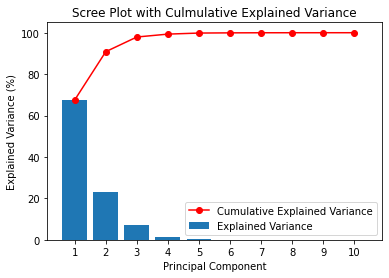

In [12]:
## Plot the culmulative explained variance by eigenvalues (first 10)
## Only showing the first 10 because the rest looks the same
plt.bar(range(10), expVar[0:10], label='Explained Variance')
plt.plot(cumExpVar[0:10], 'r-o', label='Cumulative Explained Variance')
plt.xticks(np.arange(10), ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.title("Scree Plot with Culmulative Explained Variance")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.show()

In [13]:
print('Number of eigenvalues needed to explain more than 99% of variance =', np.argmax(cumExpVar > 99) + 1)

Number of eigenvalues needed to explain more than 99% of variance = 4


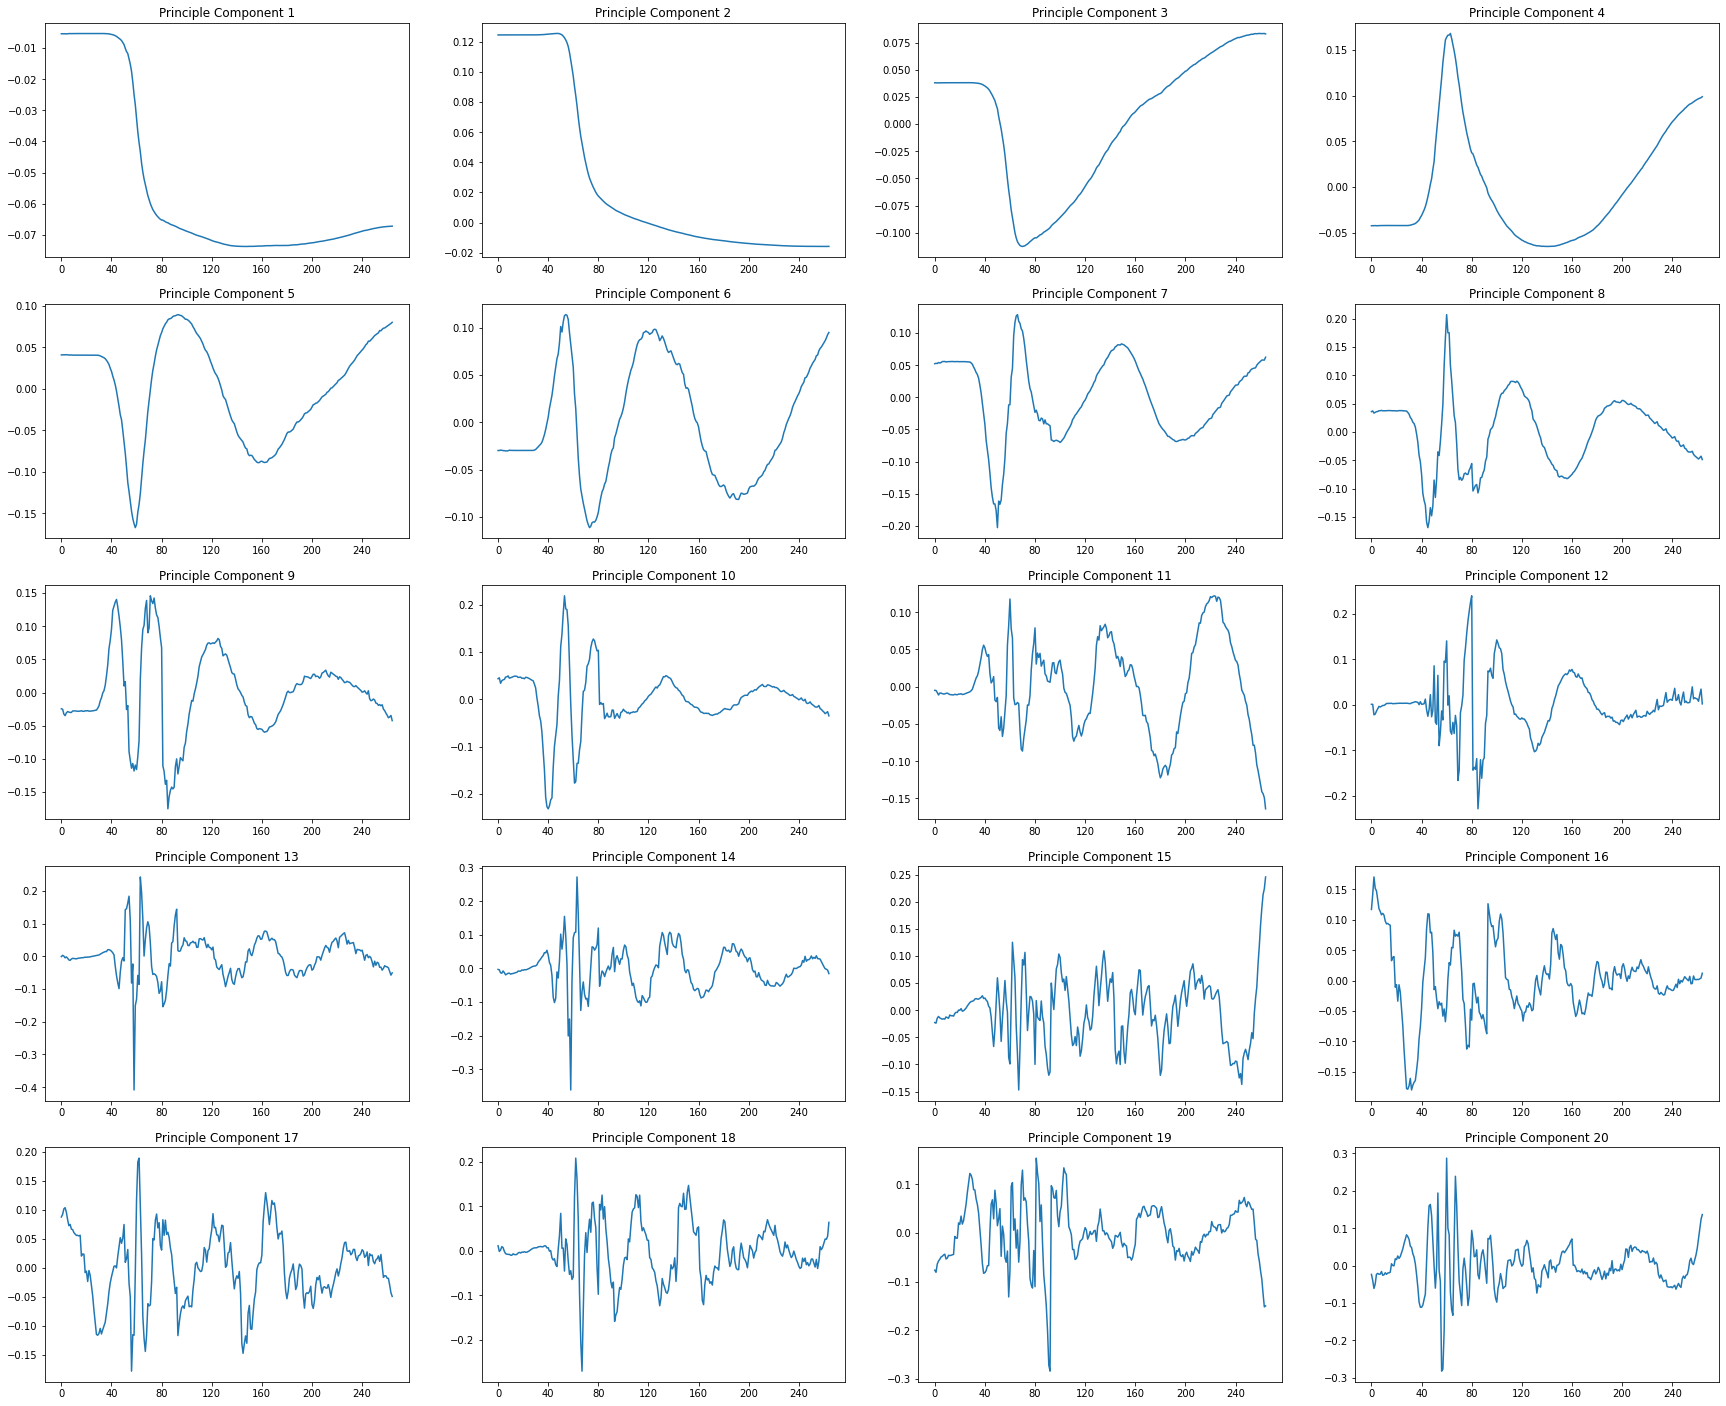

In [14]:
## Plot first 20 principal components (eigenvectors)
COUNT = 20
ROWS = math.ceil(COUNT/4)

fig, axes = plt.subplots(ROWS, 4, figsize=(30,25))

for i in range(COUNT):
  axes.flat[i].plot(eigenVectors[:, i])
  axes.flat[i].xaxis.set_major_locator(plt.MaxNLocator(9))
  axes.flat[i].set_title('Principle Component {}'.format(i+1))

From the above subplots, we can clearly see that the first 4 to 5 principal component plots have very different shapes than the rest of the PCs. The first PC plot resembles a lot of time-series plots of Covid cases in different countries. Relating to eigenvalues, the first PC explains about 67% variance within the data, which can be interpreted as such that PC1 is a best-fit curve to about 67% of countries data. Then PC2 explains another 20+ percent of variance of the data, and so on. We can see that after the first 4 PCs (about 99% of culmulative explained variance), the rest of the curves consist of more and more oscillations. Since the rest of the PCs only explain tiny percentage of variance, it is much more difficult to see trends from their plots.

# Part 3: Data reconstruction [6 Marks]

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[2]**
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. **[1]**
4.   The RMSE of reconstruction as a function of number of included components. **[1]**

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [15]:
## Helper function for checking RMSE values
def check_rmse_val(rmse_list: list, val):
    for i in range(len(rmse_list)):
      if rmse_list[i] < val:
        return i + 1

In [16]:
## Main function for Part 3
def pca_recon_plot(X, country_name: str):
  cases_std = StandardScaler().fit_transform(X)
  cases_std_df = pd.DataFrame(cases_std, index=X.index, columns=X.columns)

  fig, axes = plt.subplots(2, 2, figsize=(12,12))
  
  ## Plot standardized time-series data
  axes.flat[0].plot(cases_std_df.loc[country_name])
  axes.flat[0].xaxis.set_major_locator(plt.MaxNLocator(9))
  axes.flat[0].set(title='Standardized Time-Series for ' + country_name,
                   xlabel='Date',
                   ylabel='Standardized Amount Compared to World Average')
  
  ## Construct covariance matrix
  cases_cov = np.cov(cases_std.T)
  ## Compute eigenvalues and eigenvectors
  eigenValues, eigenVectors = np.linalg.eigh(cases_cov)
  ## Sort both based on decreasing order of eigenvalues
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]

  ## Projection, Reconstruction, residual errors and RMSE
  PC_count = 10
  rmse_list = []
  for i in range(PC_count):
    W = eigenVectors[:, 0:i+1]
    projX = np.dot(cases_std, W)
    reconX = np.dot(projX, W.T)
    reconX_df = pd.DataFrame(reconX, index=X.index, columns=X.columns)
    ## Calculate residual errors
    res = reconX_df.loc[country_name] - cases_std_df.loc[country_name]
    rmse = math.sqrt(mean_squared_error(cases_std_df.loc[country_name], reconX_df.loc[country_name]))
    rmse_list.append(rmse)
    
    ## Plot incremental reconstruction
    axes.flat[1].plot(reconX_df.loc[country_name], label='PC' + str(i+1))
    axes.flat[1].xaxis.set_major_locator(plt.MaxNLocator(9))
    axes.flat[1].legend(loc='upper right')
    axes.flat[1].set(title='Incremental Reconstruction of Standardized Time-Series for ' + country_name,
                   xlabel='Date',
                   ylabel='Standardized Amount Compared to World Average')
    
    ## Plot residual errors for each reconstruction above
    axes.flat[2].plot(res, label='PC' + str(i+1))
    axes.flat[2].xaxis.set_major_locator(plt.MaxNLocator(9))
    axes.flat[2].legend(loc='upper right')
    axes.flat[2].set(title='Residual Errors of Each Reconstruction for ' + country_name,
                   xlabel='Date',
                   ylabel='Standardized Amount Compared to World Average')
    
  axes.flat[3].plot(rmse_list)
  axes.flat[3].set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10'])
  axes.flat[3].xaxis.set_major_locator(plt.MaxNLocator(10))
  axes.flat[3].axhline(y=1, linewidth=1, color='r', linestyle="dashed", label="RMSE = 1")
  axes.flat[3].axhline(y=0.1, linewidth=1, color='b', linestyle="dashed", label="RMSE = 0.1")
  axes.flat[3].axhline(y=0.01, linewidth=1, color='g', linestyle="dashed", label="RMSE = 0.01")
  axes.flat[3].legend(loc='upper right')
  axes.flat[3].set(title='RMSE of Included PCs for ' + country_name,
                   xlabel='Number of Principal Components',
                   ylabel='RMSE')
  
  lt1 = check_rmse_val(rmse_list, 1)
  lt01 = check_rmse_val(rmse_list, 0.1)
  lt001 = check_rmse_val(rmse_list, 0.01)
  print("Using", country_name, "data:")
  if lt1 is not None:
    print(lt1, "PCs needed so that RMSE would be less than 1.")
  else:
    print("RMSE for this country does not go below 1 with 10 principal components.")
  if lt01 is not None:
    print(lt01, "PCs needed so that RMSE would be less than 0.1.")
  else:
    print("RMSE for this country does not go below 0.1 with 10 principal components.")
  if lt001 is not None:
    print(lt001, "PCs needed so that RMSE would be less than 0.01.")
  else:
    print("RMSE for this country does not go below 0.01 with 10 principal components.")

Using US data:
3 PCs needed so that RMSE would be less than 1.
5 PCs needed so that RMSE would be less than 0.1.
8 PCs needed so that RMSE would be less than 0.01.


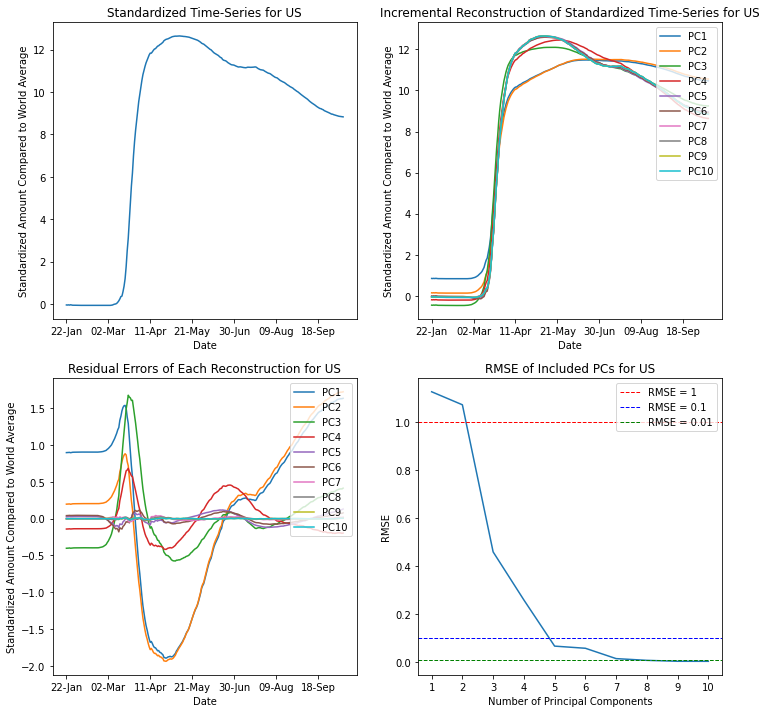

In [17]:
## Testing using US data
pca_recon_plot(cases_raw, 'US')

Using Canada data:
1 PCs needed so that RMSE would be less than 1.
3 PCs needed so that RMSE would be less than 0.1.
7 PCs needed so that RMSE would be less than 0.01.


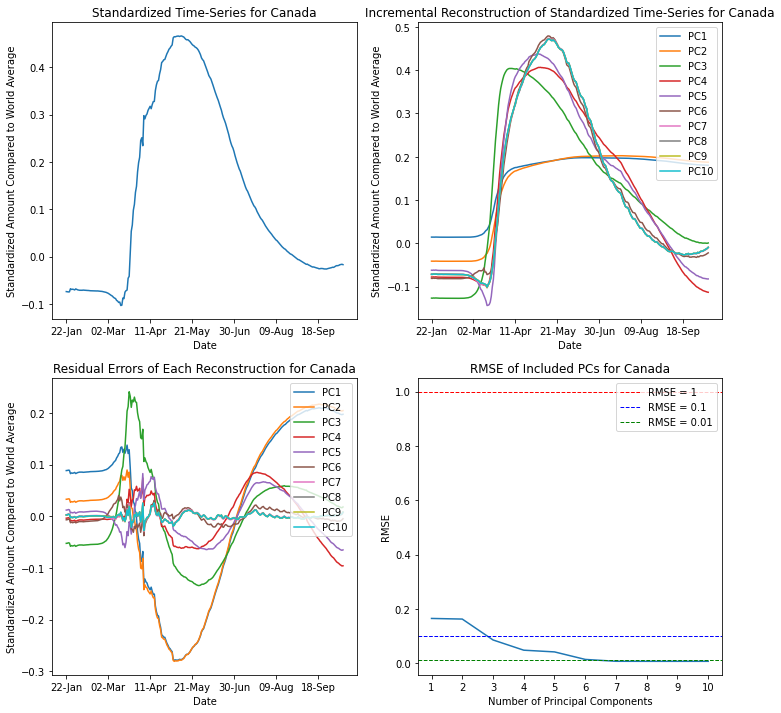

In [18]:
## Testing using Canada data
pca_recon_plot(cases_raw, 'Canada')

Using China data:
2 PCs needed so that RMSE would be less than 1.
4 PCs needed so that RMSE would be less than 0.1.
5 PCs needed so that RMSE would be less than 0.01.


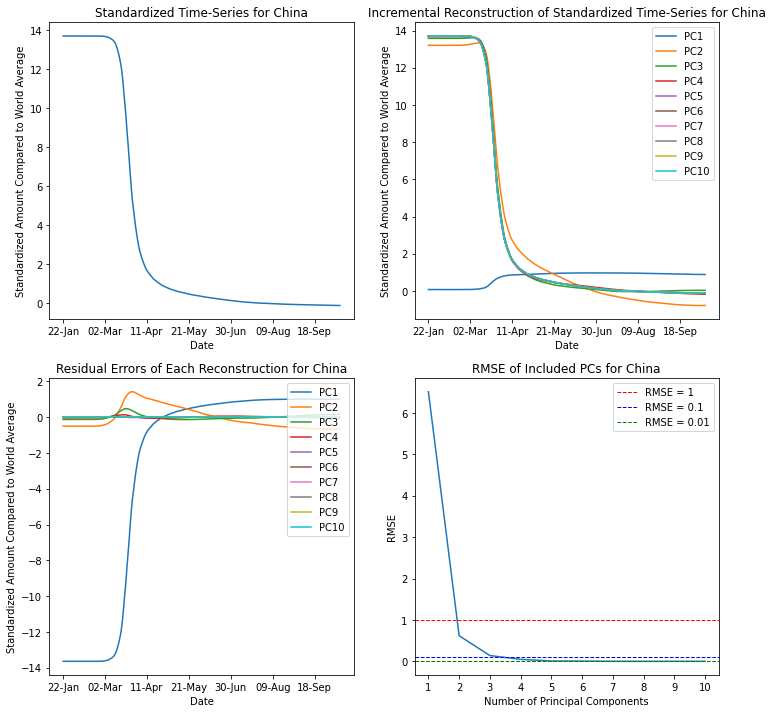

In [19]:
## Testing using China data
pca_recon_plot(cases_raw, 'China')

# Part 4: Time-series analysis on death cases [3 Marks]
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2) **[1]** and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


## Part 4.1: Visualization and Standardization

In [20]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

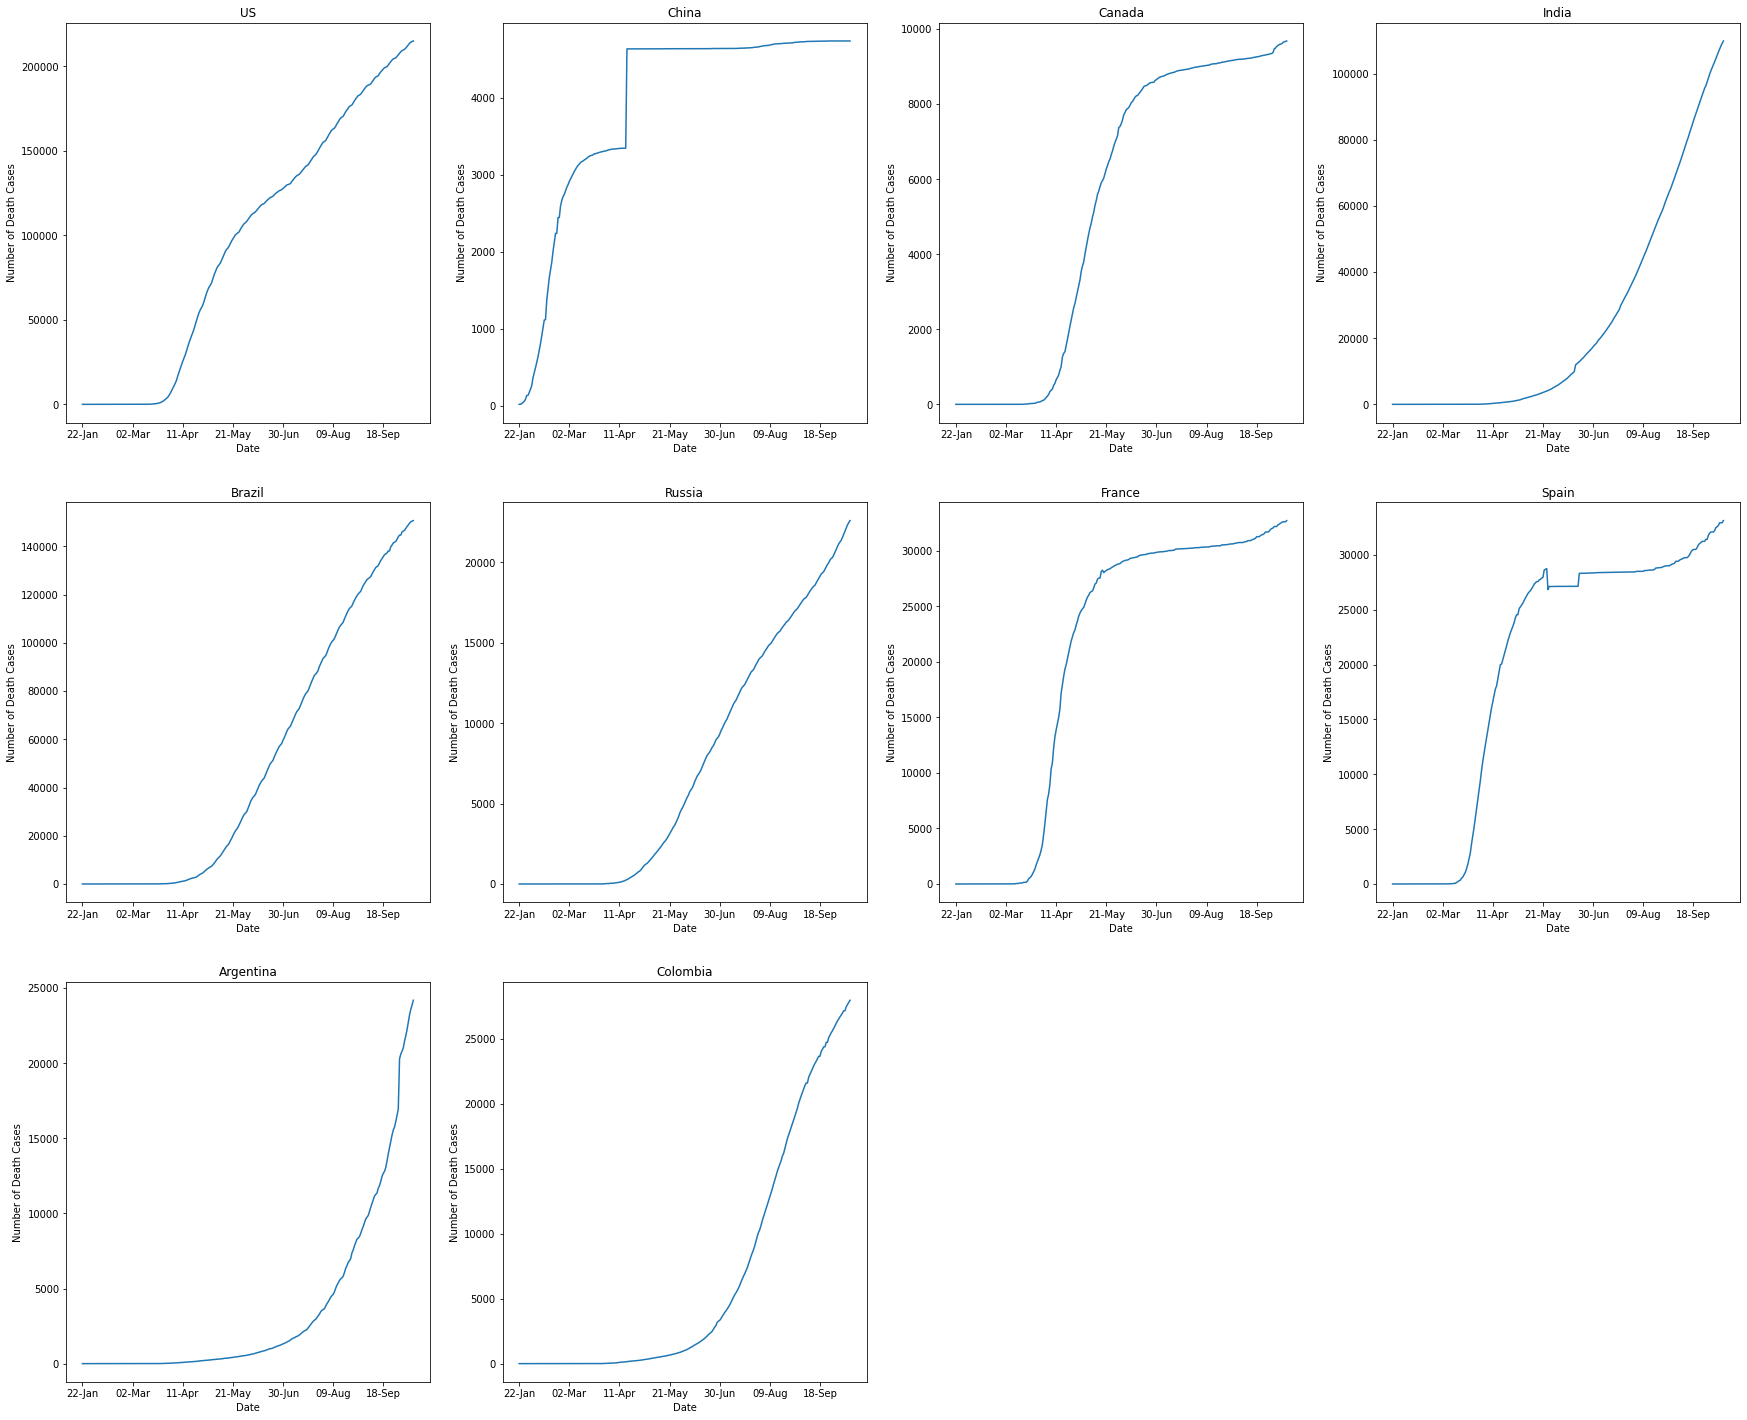

In [21]:
## Generate a list of 10 countries
country_list = ['US', 'China', 'Canada', 'India', 'Brazil', 'Russia', 'France',
                'Spain', 'Argentina', 'Colombia']

## Plot time-series of raw death data
fig, axes = plt.subplots(3, 4, figsize=(30,25))

for i in range(len(country_list)):
  axes.flat[i].plot(death_raw.loc[country_list[i]])
  axes.flat[i].xaxis.set_major_locator(plt.MaxNLocator(9))
  axes.flat[i].set(title=country_list[i], 
                   xlabel='Date',
                   ylabel='Number of Death Cases')

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

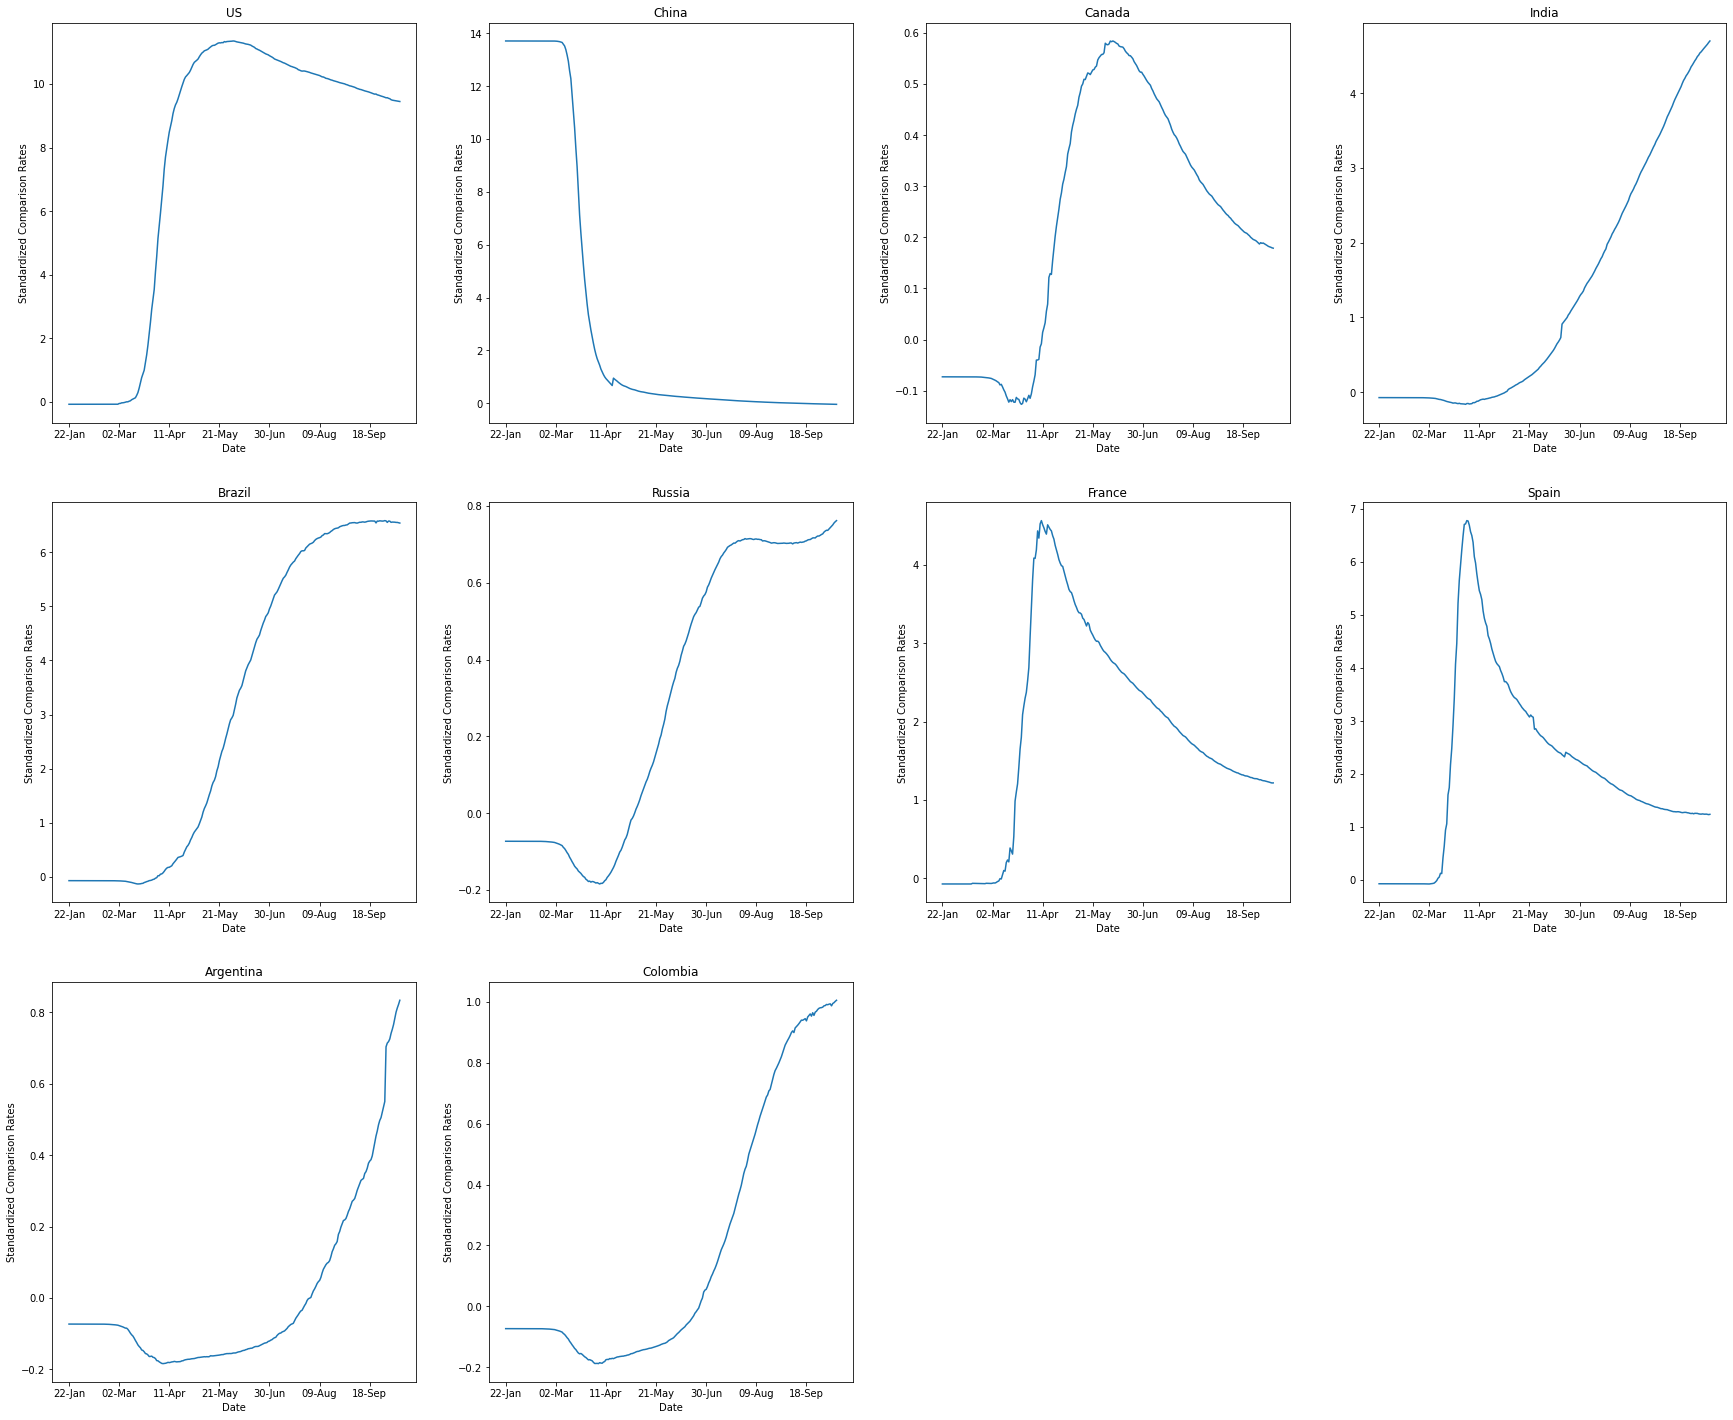

In [22]:
## Standardization of death data
death_std = StandardScaler().fit_transform(death_raw)

## Plot time-series of standardized death data
death_std_df = pd.DataFrame(death_std, index=death_raw.index, columns=death_raw.columns)

fig, axes = plt.subplots(3, 4, figsize=(30,25))

for i in range(len(country_list)):
  axes.flat[i].plot(death_std_df.loc[country_list[i]])
  axes.flat[i].xaxis.set_major_locator(plt.MaxNLocator(9))
  axes.flat[i].set(title=country_list[i], 
                   xlabel='Date',
                   ylabel='Standardized Comparison Rates')

fig.delaxes(axes[2][2])
fig.delaxes(axes[2][3])

## Part 4.2: PCA

In [23]:
## Compute covariance matrix of standardize death data
death_cov = np.cov(death_std.T)

## Check shape
death_cov.shape

(265, 265)

In [24]:
## Compute eigenvalues and eigenvectors
eigenValues, eigenVectors = np.linalg.eigh(death_cov)
eigenValues.shape, eigenVectors.shape

((265,), (265, 265))

In [25]:
## Sort based on decreasing order of eigenvalues
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [26]:
## Culmulative explained variance with the eigenvalues
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 67.65653395,  89.72478867,  97.46016907,  99.62997172,
        99.86177852,  99.96646288,  99.98673304,  99.99370943,
        99.99590624,  99.9974685 ,  99.99821564,  99.99859095,
        99.9989341 ,  99.99919707,  99.99938327,  99.99955726,
        99.9996595 ,  99.99972922,  99.99978712,  99.99983334,
        99.99986915,  99.99989241,  99.99991128,  99.99992518,
        99.99993768,  99.99994748,  99.99995531,  99.99996155,
        99.99996724,  99.99997238,  99.99997649,  99.99997933,
        99.99998189,  99.99998402,  99.99998589,  99.99998739,
        99.99998874,  99.99998984,  99.99999085,  99.99999169,
        99.99999244,  99.99999309,  99.99999368,  99.99999424,
        99.9999947 ,  99.99999516,  99.99999556,  99.99999593,
        99.99999626,  99.99999657,  99.99999687,  99.99999715,
        99.99999737,  99.99999758,  99.99999777,  99.99999795,
        99.99999812,  99.99999829,  99.99999842,  99.99999854,
        99.99999865,  99.99999875,  99.99999884,  99.99

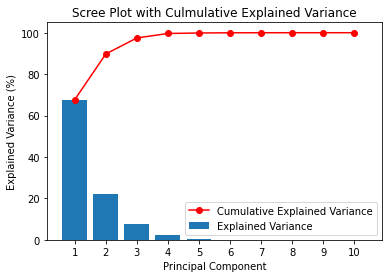

In [27]:
## Plot the culmulative explained variance by eigenvalues (first 10)
## Only showing the first 10 because the rest looks the same
plt.bar(range(10), expVar[0:10], label='Explained Variance')
plt.plot(cumExpVar[0:10], 'r-o', label='Cumulative Explained Variance')
plt.xticks(np.arange(10), ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.title("Scree Plot with Culmulative Explained Variance")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.show()

In [28]:
print('Number of eigenvalues needed to explain more than 99% of variance =', np.argmax(cumExpVar > 99) + 1)

Number of eigenvalues needed to explain more than 99% of variance = 4


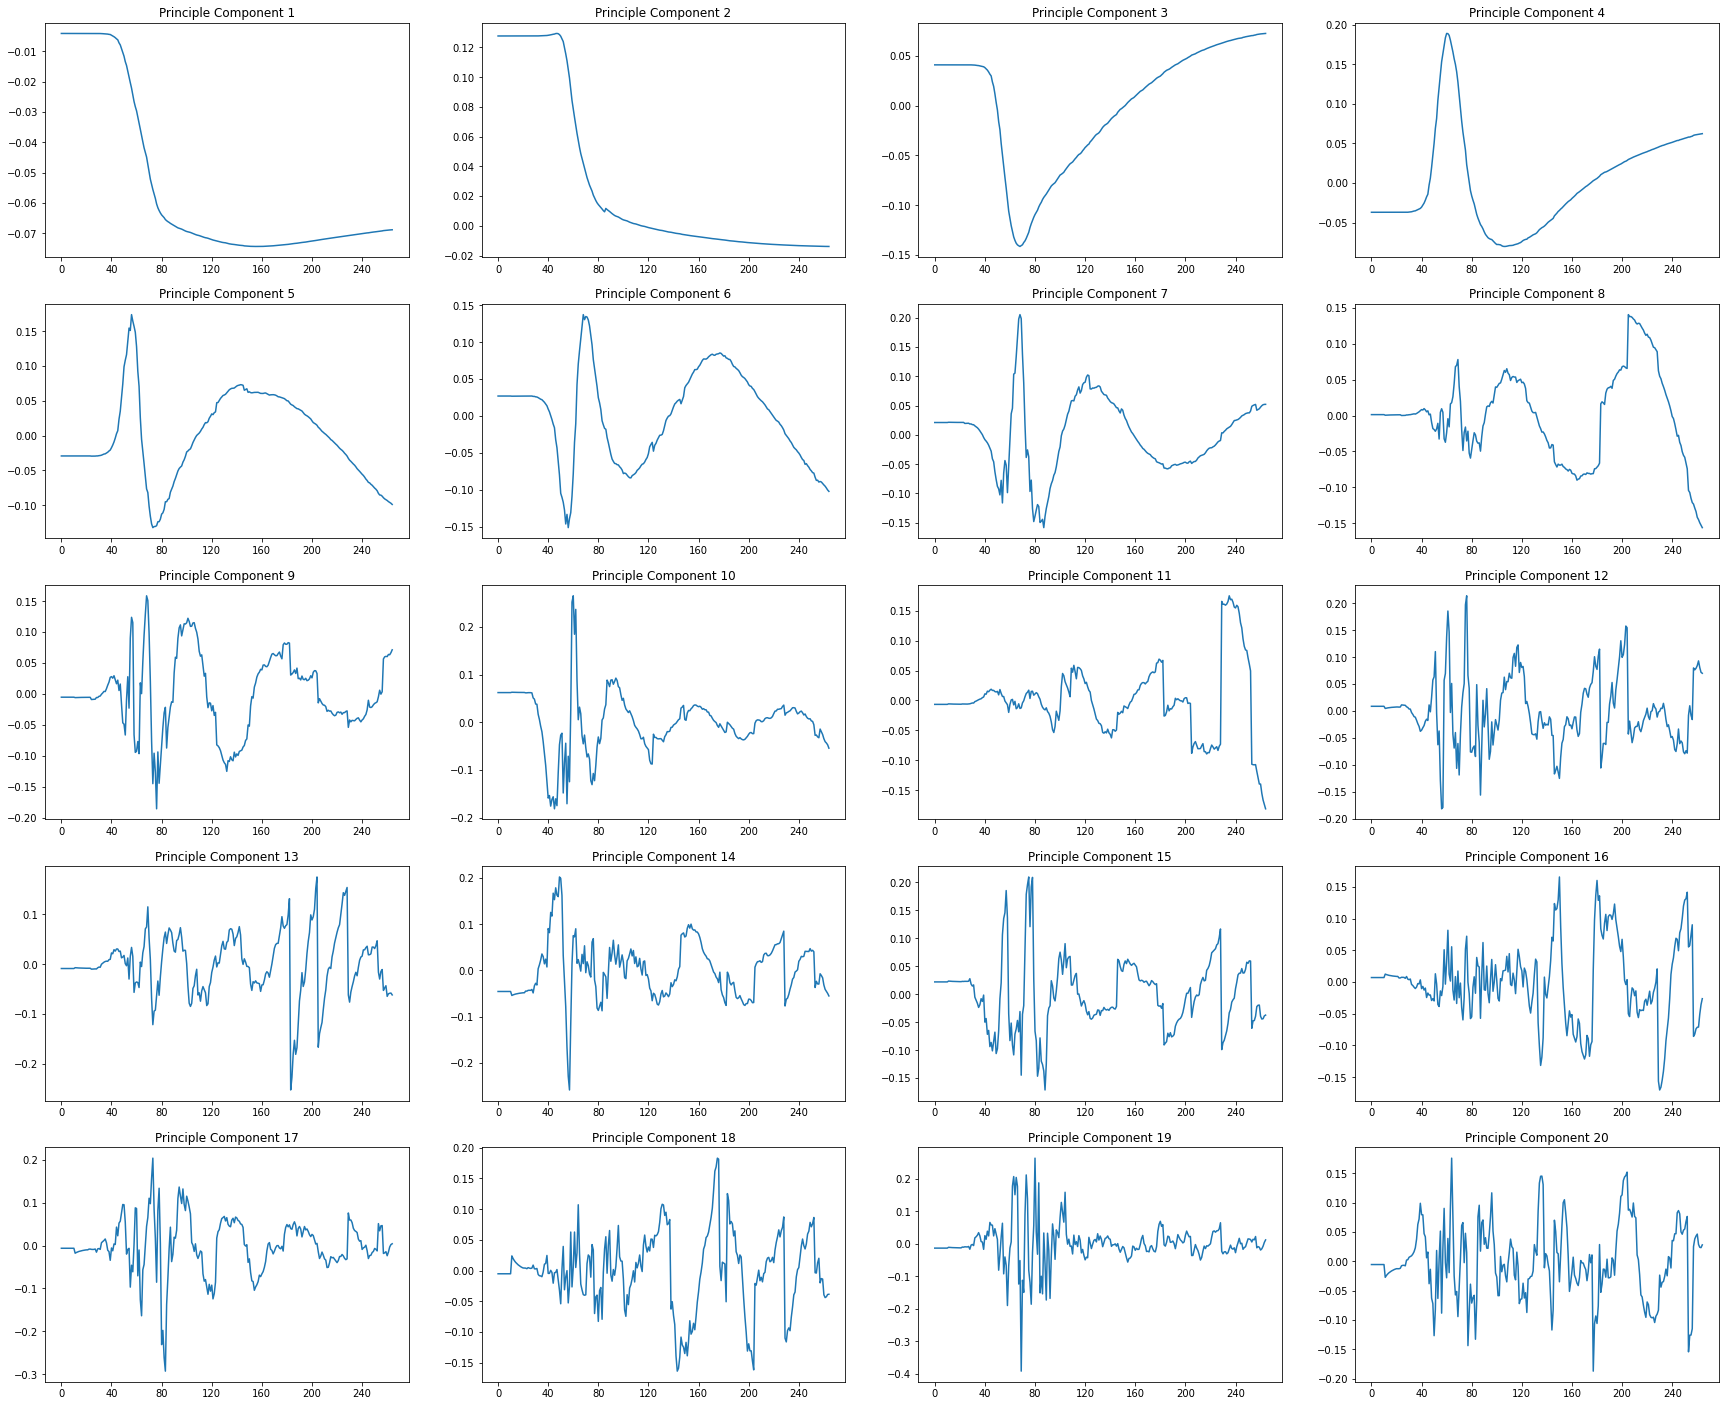

In [29]:
## Plot first 20 principal components (eigenvectors)
COUNT = 20
ROWS = math.ceil(COUNT/4)

fig, axes = plt.subplots(ROWS, 4, figsize=(30,25))

for i in range(COUNT):
  axes.flat[i].plot(eigenVectors[:, i])
  axes.flat[i].xaxis.set_major_locator(plt.MaxNLocator(9))
  axes.flat[i].set_title('Principle Component {}'.format(i+1))

## Part 4.3: Data Reconstruction

Using US data:
2 PCs needed so that RMSE would be less than 1.
6 PCs needed so that RMSE would be less than 0.1.
8 PCs needed so that RMSE would be less than 0.01.


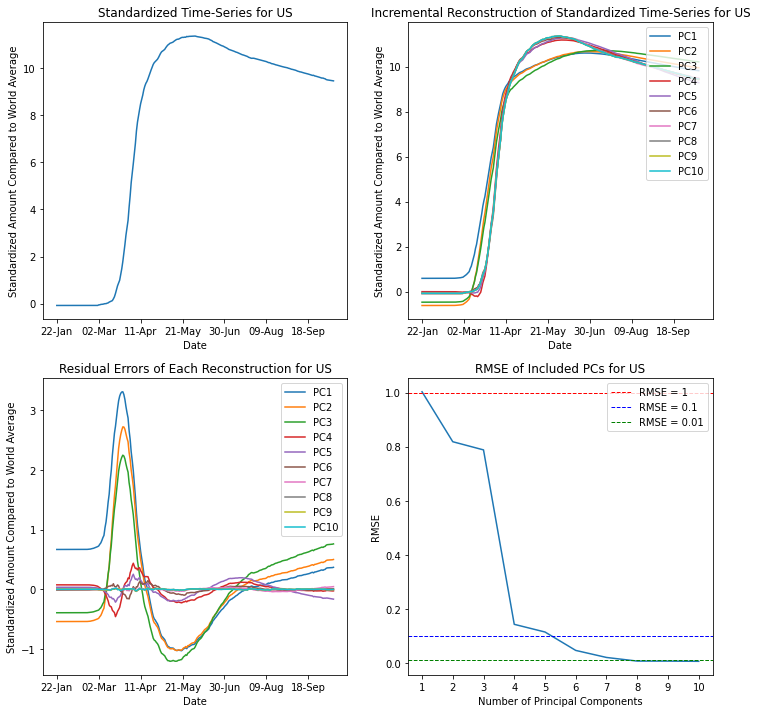

In [30]:
## Testing using US data
pca_recon_plot(death_raw, 'US')

Using Canada data:
1 PCs needed so that RMSE would be less than 1.
5 PCs needed so that RMSE would be less than 0.1.
RMSE for this country does not go below 0.01 with 10 principal components.


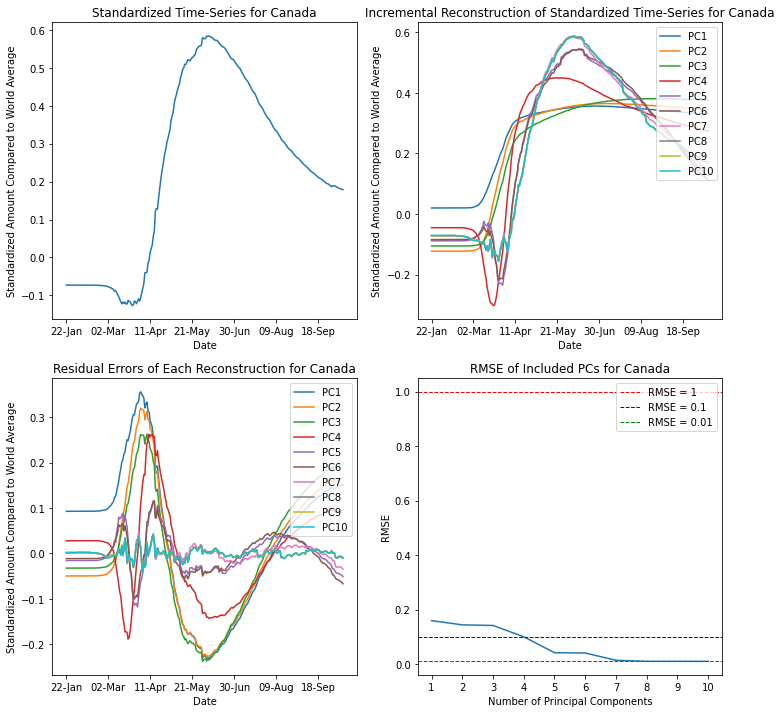

In [31]:
## Testing using Canada data
pca_recon_plot(death_raw, 'Canada')

Using China data:
2 PCs needed so that RMSE would be less than 1.
4 PCs needed so that RMSE would be less than 0.1.
5 PCs needed so that RMSE would be less than 0.01.


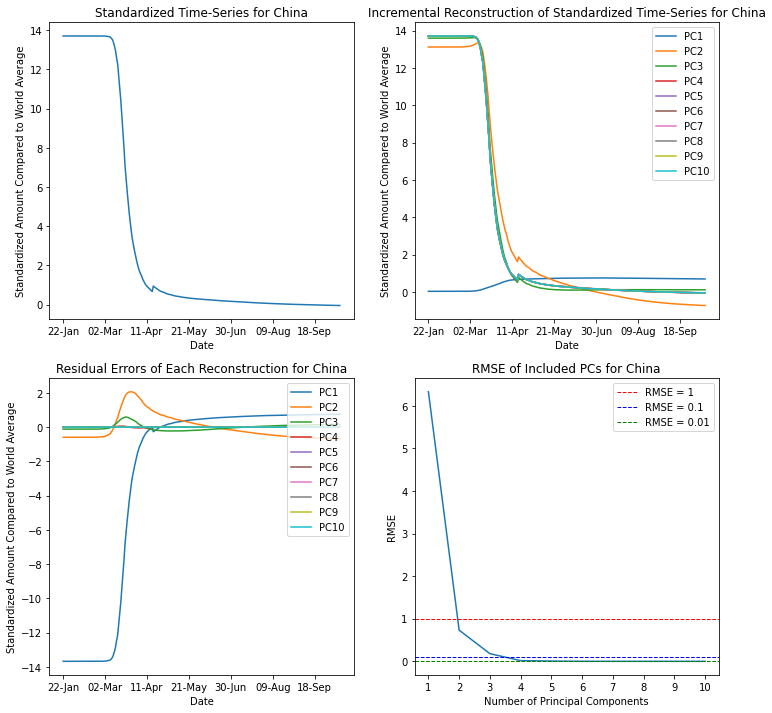

In [32]:
## Testing using China data
pca_recon_plot(death_raw, 'China')

Since the RMSE for Canada death cases does not go below 0.01 for the first 10 PC, here we try to find the number of PC needed for it to go below 0.01.

In [49]:
## Projection, Reconstruction, residual errors and RMSE
PC_count = 11
rmse_list = []
for i in range(PC_count):
  W = eigenVectors[:, 0:i+1]
  projX = np.dot(death_std, W)
  reconX = np.dot(projX, W.T)
  reconX_df = pd.DataFrame(reconX, index=death_raw.index, columns=death_raw.columns)
  ## Calculate residual errors
  res = reconX_df.loc["Canada"] - death_std_df.loc["Canada"]
  rmse = math.sqrt(mean_squared_error(death_std_df.loc["Canada"], reconX_df.loc["Canada"]))
  rmse_list.append(rmse)

Using Canada data:
1 PCs needed so that RMSE would be less than 1.
5 PCs needed so that RMSE would be less than 0.1.
11 PCs needed so that RMSE would be less than 0.01.


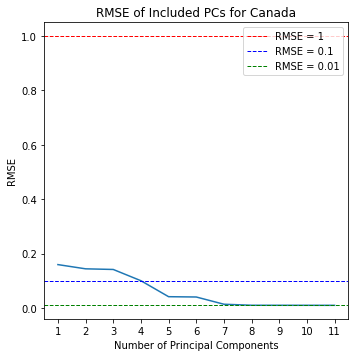

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

axes.flat[0].plot(rmse_list)
axes.flat[0].set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11'])
axes.flat[0].xaxis.set_major_locator(plt.MaxNLocator(11))
axes.flat[0].axhline(y=1, linewidth=1, color='r', linestyle="dashed", label="RMSE = 1")
axes.flat[0].axhline(y=0.1, linewidth=1, color='b', linestyle="dashed", label="RMSE = 0.1")
axes.flat[0].axhline(y=0.01, linewidth=1, color='g', linestyle="dashed", label="RMSE = 0.01")
axes.flat[0].legend(loc='upper right')
axes.flat[0].set(title='RMSE of Included PCs for Canada',
                xlabel='Number of Principal Components',
                ylabel='RMSE')

fig.delaxes(axes[0][1])
fig.delaxes(axes[1][0])
fig.delaxes(axes[1][1])

lt1 = check_rmse_val(rmse_list, 1)
lt01 = check_rmse_val(rmse_list, 0.1)
lt001 = check_rmse_val(rmse_list, 0.01)
print("Using Canada data:")
if lt1 is not None:
  print(lt1, "PCs needed so that RMSE would be less than 1.")
else:
  print("RMSE for this country does not go below 1 with 10 principal components.")
if lt01 is not None:
  print(lt01, "PCs needed so that RMSE would be less than 0.1.")
else:
  print("RMSE for this country does not go below 0.1 with 10 principal components.")
if lt001 is not None:
  print(lt001, "PCs needed so that RMSE would be less than 0.01.")
else:
  print("RMSE for this country does not go below 0.01 with 10 principal components.")

For the Canada death data, we need 11 PCs for the RMSE to be less than 0.01.

# Part 5: MNIST dataset [5 Marks]
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[1]**
* Plot the first 10 eigenvectors. What trends do you observe? **[1]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[1]**
* With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections* **[1]**

In [33]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [34]:
x.shape

(1000, 784)

Label is: 4


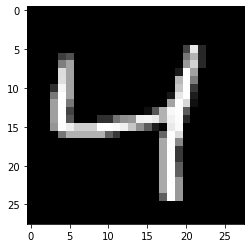

In [35]:
import matplotlib.pyplot as plt 

plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show()

Since the x here is already in the "row matrix" form with the 1000 (28*28) objects in the (1000, 784) form, we can go ahead and use the x directly for calculating the mean image for this set of MNIST digits.

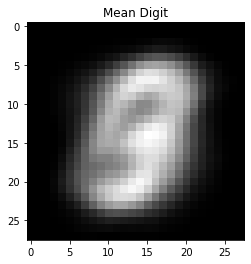

In [36]:
## Calculating mean digit image
mean_digit = np.reshape(x.mean(axis=0), x[0].shape)
plt.imshow(mean_digit.reshape(28, 28), cmap=plt.cm.gray)
plt.title('Mean Digit')
plt.show()

## Part 5.1 Compute covariance and Eigendecomposition

In [37]:
x_std = x - mean_digit

## Compute covariance matrix of standardize images
x_cov = np.cov(x_std.T)

## Check shape
x_cov.shape

(784, 784)

In [38]:
x_cov

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
eigenValues, eigenVectors = np.linalg.eigh(x_cov)
eigenValues.shape, eigenVectors.shape

((784,), (784, 784))

In [39]:
## Sort based on decreasing order of eigenvalues
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

## Part 5.2 Plot first 10 eigenvectors

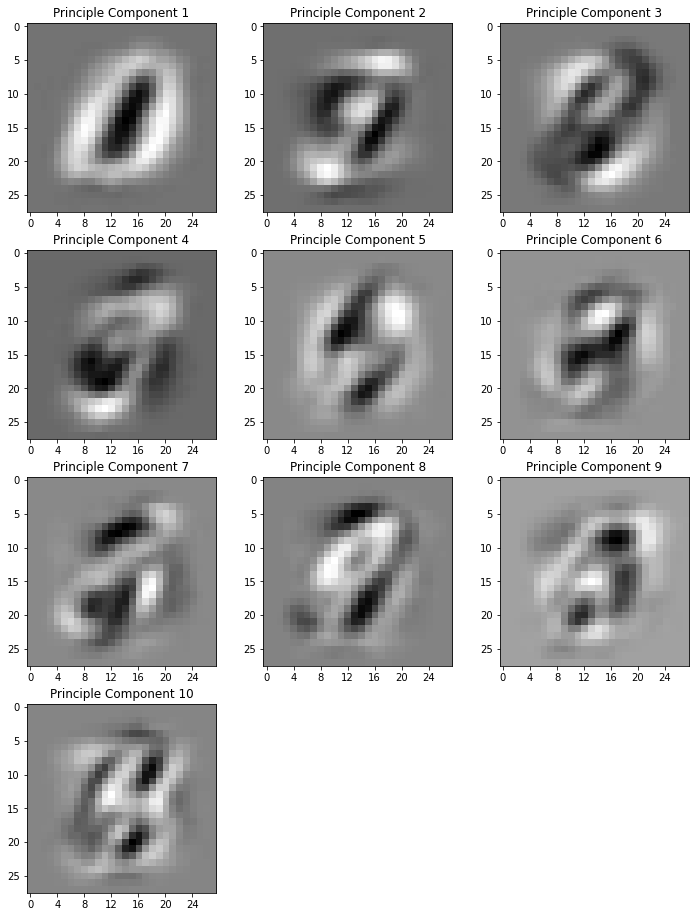

In [40]:
## Plot first 10 principal components (eigenvectors)
COUNT = 10
ROWS = math.ceil(COUNT/3)

fig, axes = plt.subplots(ROWS, 3, figsize=(12, ROWS * 4))

for i in range(COUNT):
  axes.flat[i].imshow(eigenVectors[:, i].reshape(28, 28))
  axes.flat[i].xaxis.set_major_locator(plt.MaxNLocator(9))
  axes.flat[i].set_title('Principle Component {}'.format(i+1))

fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])

From the first 10 eigenvectors / principal components, we can see that although they are all vague and appear to be just a blob of black and white, the first few pictures are more distinct in their black-to-white ratio. The least we can see is that the first one seem to be 0. Each PC after that consists of more and more lines or shapes, which makes sense because they are trying to explain the variance in an increasingly granular level.

## Part 5.3 Function for Incremental Reconstruction

In [41]:
## Helper functions from tutorial codes
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [42]:
import random

## Main function for Part 5
def pca_recon_digit(n: int):
  ## Initialize random integer between 1 - 1000
  RAN_IDX = random.randint(0, 1000)

  ## Create reconstructed images
  mean = x.mean(axis=0)
  COUNT = n
  reconImages = []
  for i in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:i], x[RAN_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:i], P, mean)
    reconImages.append(R.reshape(x[0].shape))
  
  ## Plot reconstructed images
  ROWS = math.ceil(COUNT/4)
  fig = plt.figure(figsize=(12, ROWS * 4))
  for i in range(0, COUNT):
    plt.subplot(ROWS, 4, i+1)
    plt.imshow(reconImages[i].reshape(28, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))


## Part 5.4 Testing Reconstruction Function to Determine Number of Components Needed

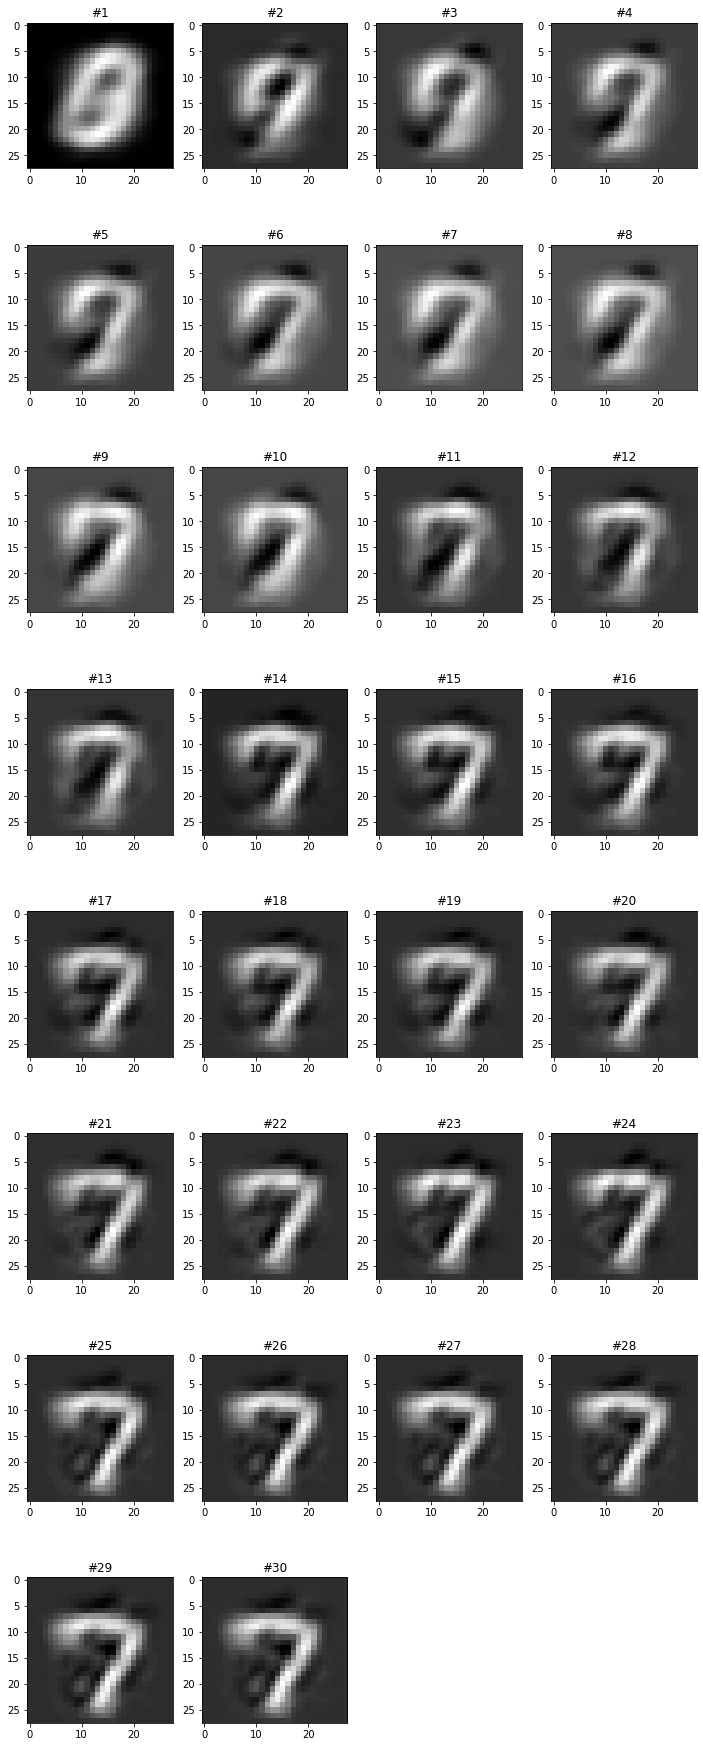

In [43]:
## Testing reconstruction function
pca_recon_digit(30)

After running the above function multiple times, we can see that we need at least 30 components to clearly identify the numbers, taking into account the more obscure cases. Some numbers are much more difficult for us to identify than others, such as 4, 5 and 6. On the contrary, 0 and 1's are the easiest to identify.

## Part 5.5 Compression Ratio

In [44]:
## Using the 30 components from above for worst case scenario
total_element = 1000 * 784
PC_count = 30
pca_element = 784 * PC_count
projection_element = 1000 * PC_count
elements = pca_element + projection_element

In [45]:
print("The compression ratio with", PC_count, "components = ", "%.2f" % (total_element / elements))

The compression ratio with 30 components =  14.65


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


